<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/Ridge_Regularization_(L2_norm)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_diabetes

In [3]:
data = load_diabetes()

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [7]:
y_pred = lr.predict(X_test)

In [8]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [9]:
print("r2_score",r2)
print("rmse",np.sqrt(mse))

r2_score 0.5188113124539249
rmse 48.72713760953253


In [10]:
# using ridge regression

In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.0001)         # to get the best value of alpha either try using multiple values and find the best one or use crossvalidation , gridfoldcv
ridge.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [12]:
y_pred1 = ridge.predict(X_test)

In [13]:
r2_1 = r2_score(y_test,y_pred1)
mse_1 = mean_squared_error(y_test,y_pred1)

In [14]:
print("r2_score",r2_1)
print("rmse",np.sqrt(mse_1))

r2_score 0.5189732635884949
rmse 48.71893700181956


In [15]:
# doing the same with ridge CV

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=[ 0.01 , 0.1 , 1 ,10,100],store_cv_results=True)
ridge_cv.fit(X_train,y_train)
y_pred_2 = ridge_cv.predict(X_test)

In [16]:
r2_2 = r2_score(y_test,y_pred_2)
mse_2 = mean_squared_error(y_test,y_pred_2)
print("r2_score",r2_2)
print("rmse",np.sqrt(mse_2))

r2_score 0.5230847087541299
rmse 48.51028426441043


In [17]:
# the linear regression and ridge regreesion perform the exact same way in this case , hence there is no such significant improvement using the ridge regression here.
# this may be beause the variance of the data would be less
# but the model become more simple and easy to understand after using the ridge regression

In [18]:
# checking the variance of the features
print(np.var(X_train,axis=0))

[0.00220149 0.00225171 0.00235065 0.00233398 0.0022388  0.00225763
 0.00224621 0.00207022 0.0022678  0.00239962]


In [19]:
# the variance in the columns is very low hence the linear and the ridge regression perform similar.

## Ridge regression from scratch

In [20]:
from sklearn.datasets import make_regression
X ,y= make_regression(n_samples=100 , n_features= 1 , n_informative= 1 , n_targets=  1, noise= 20  , random_state=13)

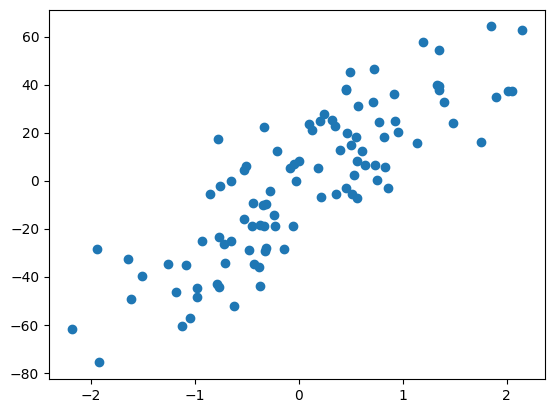

In [21]:
plt.scatter(X,y)

In [22]:
# apply the linear regression model
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X,y)
print("coefficient : ",lr.coef_)
print("intercept",lr.intercept_)

coefficient :  [27.82809103]
intercept -2.29474455867698


In [23]:
# alpha  = 10

from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print("coefficient : ",rr.coef_)
print("intercept",rr.intercept_)


coefficient :  [24.9546267]
intercept -2.1269130035235735


In [24]:
#  alpha = 100

from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print("coefficient : ",rr1.coef_)
print("intercept",rr1.intercept_)


coefficient :  [12.93442104]
intercept -1.4248441496033308


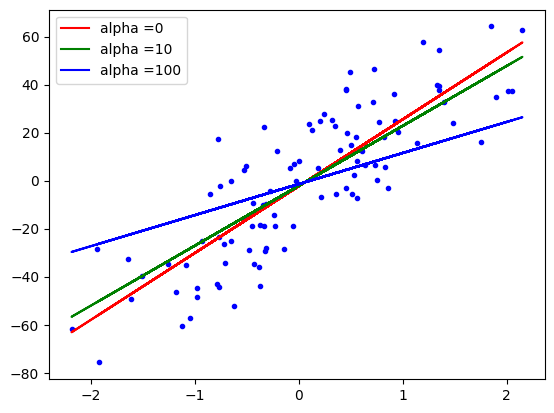

In [25]:
# plotting points and all the three regression lines

plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color = 'red',label = 'alpha =0')
plt.plot(X,rr.predict(X),color = 'green',label = 'alpha =10')
plt.plot(X,rr1.predict(X),color = 'blue',label = 'alpha =100')
plt.legend()

## Ridge regression from scratch for data with single input column

In [28]:
# THE OLS calculation of the slope and the intercept
class MyRidge:
  def __init__(self ,alpha=0.1) :
    self.slope = alpha
    self.m = None
    self.b = None

  def fit (self,X_train ,y_train):    # in fit calculate the values of m and b using formulas
    numerator = 0
    denominator = 0
    for i in range (X_train.shape[0]):
      numerator += (y_train[i] - y_train.mean()) * (X_train[i]-X_train.mean())

      denominator+=(X_train[i]-X_train.mean())**2
    denominator +=  self.slope
    self.m  = numerator / denominator
    self.b =  y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)


  def predict(self , X_test):
    pass


In [29]:
ridgg = MyRidge(alpha=10)
ridgg.fit(X,y)

[24.9546267]
[-2.126913]
